In [22]:
# Import necessary libraries for preprocessing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Load the dataset
#Atlanta_Distance = pd.read_pickle(r'~/Documents/NYCDSA/Capstone/Pickle Files/Atlanta_Nearest_POI.pkl')
Atlanta_Density = pd.read_csv('~/Documents/NYCDSA/Capstone/Density_Atlanta/Density_Atlanta.csv')
Atlanta_Density['TotalBath'] = Atlanta_Density['number_of_full_baths'] + (Atlanta_Density['number_of_half_baths']*0.5)
Atlanta_Density = Atlanta_Density.drop(columns=['ID', 'source_property_id', 'year_built', 'source_name',
                                                  'listing_date', 'mls_id', 'census_zcta5_geoid',
                                                  'census_cbsa_geoid', 'latitude', 'longitude', 'lot_size_in_acres', 'number_of_full_baths', 'number_of_half_baths'])
Atlanta_Density = Atlanta_Density.rename(columns={'SM_One': 'Supermarket (One Mile)', 'C_One': 'Convenience (One Mile)',
'WS_One': 'Wholesale (One Mile)', 'VS_One': 'Variety Store (One Mile)', 'SC_One': 'Supercenter (One Mile)', 'number_of_bedrooms': 'Total Bedrooms', 'living_area_square_feet': 'Living Area(SQF)',
                                                   'lot_size_in_square_feet': 'Lot Size(SQF)', 'number_of_garage_spaces': 'Garage Spaces', 'number_of_stories': 'Stories',
                                                   'SM_Five': 'Supermarket (Five Miles)', 'C_Five': 'Convenience (Five Miles)',
'WS_Five': 'Wholesale (Five Miles)', 'VS_Five': 'Variety Store (Five Miles)', 'SC_Five': 'Supercenter (Five Miles)'})
Atlanta_Density_One = Atlanta_Density.drop(columns=['Wholesale (Five Miles)', 'Variety Store (Five Miles)', 'Supermarket (Five Miles)', 'Supercenter (Five Miles)', 'Convenience (Five Miles)'])
Atlanta_Density_One

,street_address,city,state,current_listing_price,Total Bedrooms,Living Area(SQF),Lot Size(SQF),has_pool,has_garage,Garage Spaces,Stories,story_indicator,Wholesale (One Mile),Variety Store (One Mile),Supermarket (One Mile),Supercenter (One Mile),Convenience (One Mile),TotalBath
0,0 ivy MNR DR NW 0,Marietta,GA,2865,4,3259.0,14810.400390,False,True,NaN,2.0,Multi,0,0,0,0,0,2.5
1,1 10 buena VIS CIR SE,Cartersville,GA,2200,3,1993.0,NaN,False,False,NaN,NaN,NaN,0,2,0,1,2,2.0
2,1 1088 coldwater DR,Griffin,GA,2000,3,1910.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
3,1 1130 willivee DR,Decatur,GA,1995,3,1134.0,NaN,False,False,NaN,NaN,NaN,0,0,0,0,0,1.0
4,1 1307 idlewood CT,Mcdonough,GA,2800,4,2532.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21021,procurement only - 66 4th ST,Newnan,GA,1600,3,1367.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
21022,r2188 executive DR,Duluth,GA,2199,3,1696.0,871.199981,False,False,NaN,NaN,NaN,0,0,1,0,1,2.5
21023,r3339 woodward down,Buford,GA,2380,3,1944.0,4356.000065,False,False,NaN,NaN,NaN,1,1,1,1,0,3.5
21024,singleunit 216 greensprings DR,Palmetto,GA,1900,4,1204.0,NaN,False,False,NaN,NaN,NaN,0,1,0,0,1,2.0


In [2]:
# Exclude 'current_listing_price' from features
numeric_features = Atlanta_Density_One.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
#categorical_features = list(Atlanta_Distance.columns[Atlanta_Distance.dtypes == 'object'])

In [3]:
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
#categorical_transformer = Pipeline(steps=[
    #('impute_none', SimpleImputer(strategy='constant', fill_value='None')),  # Using SimpleImputer
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_One)

In [4]:
# Generate column names for the one-hot encoded features
#onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
# Combine all feature names
all_feature_names = list(numeric_features)
all_feature_names

['Total Bedrooms',
 'Living Area(SQF)',
 'Lot Size(SQF)',
 'Garage Spaces',
 'Stories',
 'Wholesale (One Mile)',
 'Variety Store (One Mile)',
 'Supermarket (One Mile)',
 'Supercenter (One Mile)',
 'Convenience (One Mile)',
 'TotalBath']

In [5]:
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)
transformed_df

,Total Bedrooms,Living Area(SQF),Lot Size(SQF),Garage Spaces,Stories,Wholesale (One Mile),Variety Store (One Mile),Supermarket (One Mile),Supercenter (One Mile),Convenience (One Mile),TotalBath
0,0.641572,1.314402,-0.032974,-7.852071e-16,0.00498,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,0.050733
1,-0.459448,0.111674,0.000000,-7.852071e-16,0.00000,-0.093701,2.854824,-0.527845,3.756596,1.972893,-0.167403
2,-0.459448,0.032822,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
3,-0.459448,-0.704394,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.603676
4,0.641572,0.623736,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
...,...,...,...,...,...,...,...,...,...,...,...
21021,-0.459448,-0.483039,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
21022,-0.459448,-0.170482,-0.033370,-7.852071e-16,0.00000,-0.093701,-0.411516,0.857559,-0.229586,0.798031,0.050733
21023,-0.459448,0.065123,-0.033271,-7.852071e-16,0.00000,10.672215,1.221654,0.857559,3.756596,-0.376832,0.487006
21024,0.641572,-0.637893,0.000000,-7.852071e-16,0.00000,-0.093701,1.221654,-0.527845,-0.229586,0.798031,-0.167403


In [6]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
# Define the Kernel Ridge Regression model with default parameters
krr_model = KernelRidge(kernel='rbf')  #radial basis function kernel (default kernel), which captures non-linear relationships.
# Create a full pipeline with preprocessing and the Kernel Ridge Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', krr_model)
])
X = Atlanta_Density_One.drop(columns='current_listing_price')
y = Atlanta_Density_One['current_listing_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (One Mile)', 'Variety Store (One Mile)',
       'Supermarket (One Mile)', 'Supercenter (One Mile)',
       'Convenience (One Mile)', 'TotalBath'],
      dtype='object'))])),
                ('regressor', KernelRidge(kernel='rbf'))])

In [7]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', cv=kf, n_jobs = -1)
print(cross_val_score)
print('Avg Score:',np.mean(cross_val_score))
print('Variance:',np.var(cross_val_score))

[0.43489    0.42294942 0.41745098 0.44971412 0.39589494 0.46175664
 0.36800013 0.44509373 0.33750014 0.41573212]
Avg Score: 0.41489822104583735
Variance: 0.0013342350710008302


In [29]:
scores = [0.43489,0.42294942,0.41745098,0.44971412,0.39589494,0.46175664, 0.36800013,0.44509373,0.33750014,0.41573212]
df_scores = pd.DataFrame({
    'Fold': [f'F{i+1}' for i in range(len(scores))],
    'Score': scores
})
df_scores

,Fold,Score
0,F1,0.434890
1,F2,0.422949
2,F3,0.417451
3,F4,0.449714
4,F5,0.395895
5,F6,0.461757
6,F7,0.368000
7,F8,0.445094
8,F9,0.337500
9,F10,0.415732


C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


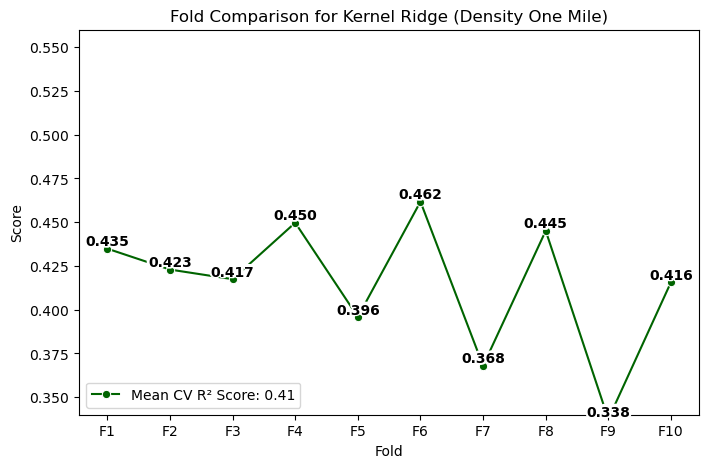

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects

# Creating a seaborn line plot with dark green color
plt.figure(figsize=(8, 5))
sns.lineplot(x='Fold', y='Score', data=df_scores, marker='o', color='darkgreen')

# Annotating each point with bold font and white outline
for i, score in enumerate(df_scores['Score']):
    # White outline (larger text in white)
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='white', 
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")])
    # Bold, dark text on top
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Fold Comparison for Kernel Ridge (Density One Mile)')
plt.ylim(.34, .56)
plt.grid(False)

plt.legend(labels=['Mean CV R² Score: 0.41'], loc='lower left')

# Display the plot
plt.show()

In [23]:
Atlanta_Density_Five = Atlanta_Density.drop(columns=['Wholesale (One Mile)', 'Variety Store (One Mile)', 'Supermarket (One Mile)', 'Supercenter (One Mile)', 'Convenience (One Mile)'])
numeric_features = Atlanta_Density_Five.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_Five)

In [24]:
# Combine all feature names
all_feature_names = list(numeric_features)
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

In [25]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
# Define the Kernel Ridge Regression model with default parameters
krr_model = KernelRidge(kernel='rbf')  #radial basis function kernel (default kernel), which captures non-linear relationships.
# Create a full pipeline with preprocessing and the Kernel Ridge Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', krr_model)
])
X = Atlanta_Density_Five.drop(columns='current_listing_price')
y = Atlanta_Density_Five['current_listing_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (Five Miles)', 'Variety Store (Five Miles)',
       'Supermarket (Five Miles)', 'Supercenter (Five Miles)',
       'Convenience (Five Miles)', 'TotalBath'],
      dtype='object'))])),
                ('regressor', KernelRidge(kernel='rbf'))])

In [26]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', cv=kf, n_jobs = -1)
print(cross_val_score)
print('Avg Score:',np.mean(cross_val_score))
print('Variance:',np.var(cross_val_score))

[0.5289473  0.52575389 0.54417579 0.51998743 0.51106975 0.55694202
 0.54039135 0.52835718 0.45980473 0.50837485]
Avg Score: 0.5223804295232747
Variance: 0.0006329692230262733


In [45]:
scores = [0.5289473,0.52575389,0.54417579,0.51998743,0.51106975,0.55694202,0.54039135,0.52835718,0.45980473,0.50837485]
df_scores = pd.DataFrame({
    'Fold': [f'F{i+1}' for i in range(len(scores))],
    'Score': scores
})

scores2 = [0.43489,0.42294942,0.41745098,0.44971412,0.39589494,0.46175664, 0.36800013,0.44509373,0.33750014,0.41573212]
df_scores2 = pd.DataFrame({
    'Fold': [f'F{i+1}' for i in range(len(scores))],
    'Score': scores2
})
df_scores

,Fold,Score
0,F1,0.528947
1,F2,0.525754
2,F3,0.544176
3,F4,0.519987
4,F5,0.511070
5,F6,0.556942
6,F7,0.540391
7,F8,0.528357
8,F9,0.459805
9,F10,0.508375


C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\immed\Programming\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

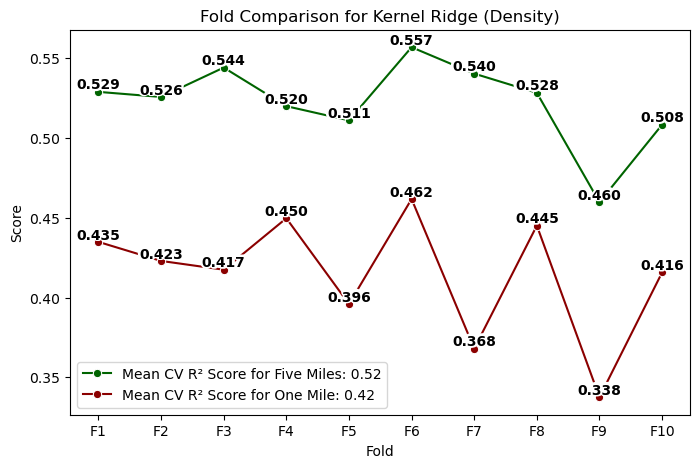

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects

# Creating a seaborn line plot with dark green color for df_scores and dark red for df_scores2
plt.figure(figsize=(8, 5))
sns.lineplot(x='Fold', y='Score', data=df_scores, marker='o', color='darkgreen', label='Mean CV R² Score for Five Miles: 0.52')
sns.lineplot(x='Fold', y='Score', data=df_scores2, marker='o', color='darkred', label='Mean CV R² Score for One Mile: 0.42')

# Annotating each point for df_scores with bold font and white outline
for i, score in enumerate(df_scores['Score']):
    # White outline (larger text in white)
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='white', 
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")])
    # Bold, dark text on top
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Annotating each point for df_scores2 with bold font and white outline
for i, score in enumerate(df_scores2['Score']):
    # White outline (larger text in white)
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='white', 
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")])
    # Bold, dark text on top
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Fold Comparison for Kernel Ridge (Density)')
plt.grid(False)

# Displaying the legend
plt.legend(loc='lower left')

# Display the plot
plt.show()